In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
import os
import keras_tuner as kt
from tensorflow import keras 

In [2]:
img=image.load_img(r"D:\dataset_for_ml\cifar\airplane\30_airplane.png")

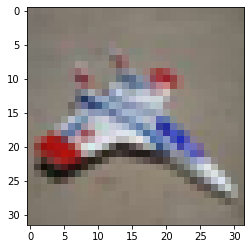

In [3]:
plt.imshow(img)

In [5]:
cv2.imread(r"D:\dataset_for_ml\cifar\airplane\30_airplane.png").shape

(32, 32, 3)

In [8]:
batch_size=32
img_height=200
img_width=200
data_dir=r'D:\dataset_for_ml\cifar'

# Loading the dataset

In [9]:
data_gen=ImageDataGenerator(
                        horizontal_flip=True,
                        vertical_flip=True,
                        shear_range=0.2,
                        zoom_range=0.2,
                        width_shift_range=0.2,
                        height_shift_range=0.2
                        )


In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 50000 files belonging to 10 classes.
Using 40000 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 50000 files belonging to 10 classes.
Using 10000 files for validation.


# Class Names

In [12]:
class_names=train_ds.class_names
print(class_names)

['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Examples in training dataset

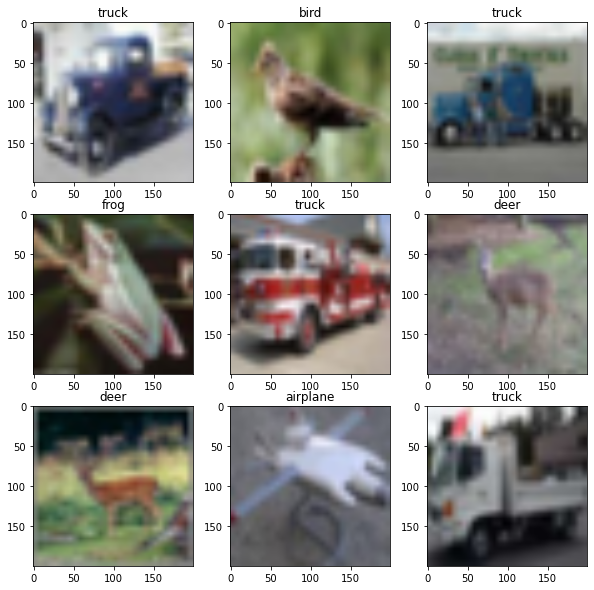

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

# Model

In [34]:
model = keras.Sequential()
    
   
     
model.add(keras.layers.Rescaling(1./255,input_shape=(img_height,img_width,3)))
model.add(keras.layers.AveragePooling2D(6,3))
    
    
model.add(keras.layers.Conv2D(64, 3,activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))

              
model.add(keras.layers.Conv2D(32,3,activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))

              
model.add(keras.layers.Conv2D(16,3,activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
    
    
model.add(keras.layers.Dropout(0.5))

              
model.add(keras.layers.Flatten())
    
    
              
model.add(keras.layers.Dense(128,activation='relu')


model.add(keras.layers.Dense(10,activation='softmax'))

In [35]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 50, 256)       147712    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 25, 25, 256)     

In [28]:
##save our models in the directory 

checkpoint=tf.keras.callbacks.ModelCheckpoint('D:\dataset_for_ml\cifar\model\cifar_model.h5',
                                              monitor='val_loss',   ### validation loss
                                              mode='min',
                                              save_best_only=True)  ## save the best models which have least errors


callbacks=checkpoint

In [36]:
model.compile(optimizer = 'adam',
              loss= keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Fitting the dataset

In [40]:
history=model.fit(train_ds,
                validation_data=val_ds,
                epochs=10,
                callbacks=callbacks)

Epoch 1/10
1250/1250 [==============================] - 216s 173ms/step - loss: 1.7277 - accuracy: 0.3688 - val_loss: 1.5002 - val_accuracy: 0.4605
Epoch 2/10
1250/1250 [==============================] - 176s 141ms/step - loss: 1.4754 - accuracy: 0.4638 - val_loss: 1.3432 - val_accuracy: 0.5166
Epoch 3/10
1250/1250 [==============================] - 175s 140ms/step - loss: 1.3741 - accuracy: 0.5027 - val_loss: 1.2402 - val_accuracy: 0.5579
Epoch 4/10
1250/1250 [==============================] - 184s 148ms/step - loss: 1.3068 - accuracy: 0.5327 - val_loss: 1.1984 - val_accuracy: 0.5703
Epoch 5/10
1250/1250 [==============================] - 182s 146ms/step - loss: 1.2473 - accuracy: 0.5568 - val_loss: 1.1517 - val_accuracy: 0.5980
Epoch 6/10
1250/1250 [==============================] - 177s 141ms/step - loss: 1.2031 - accuracy: 0.5745 - val_loss: 1.1108 - val_accuracy: 0.6074
Epoch 7/10
1250/1250 [==============================] - 174s 139ms/step - loss: 1.1691 - accuracy: 0.5827 - val_

# Plotting the Progress

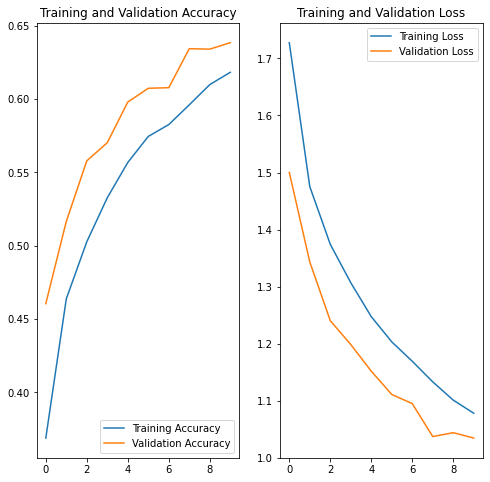

In [42]:
epochs=10

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model=keras.models.load_model(r"D:\dataset_for_ml\cifar\model\cifar_model.h5")

# Loading the test image for prediction

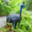

In [44]:
from IPython.display import Image
flower_path = r'D:\dataset_for_ml\cifar\bird\6_bird.png'

Image(flower_path,width=200,height=200)

# Predicting the class of the image

This image most likely belongs to bird class


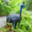

In [45]:
file_path = r'D:\dataset_for_ml\cifar\bird\6_bird.png'


img = tf.keras.utils.load_img(
                              file_path, 
                              target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


predictions = model.predict(img_array)

score = tf.nn.softmax(predictions[0])


print(
    "This image most likely belongs to {} class"
    .format(class_names[np.argmax(score)])
)


Image(file_path,width=200,height=200)